Input size is (1, 28, 28)


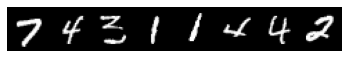

In [1]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision.utils as vutils
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

data = datasets.MNIST(root='./data',download=True, transform=transforms.ToTensor())
img_shape = (data[1][0].size(0), data[1][0].size(1), data[1][0].size(2))
print(f'Input size is {img_shape}')

# Prepare dataloader for training
batch_size = 64
dataloader = DataLoader(data, batch_size=batch_size, shuffle=True, num_workers=4)

# Plot some training images
real_batch, _ = next(iter(dataloader))
plt.figure(figsize=(6,6))
plt.axis("off")
plt.imshow(np.transpose(vutils.make_grid(real_batch[:8], padding=2, normalize=True).cpu(),(1,2,0)))
plt.show()

In [2]:
# VAE training
from Vanilla_VAE_pytorch import *

lr = 0.0005
cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if cuda else "cpu")

# Initialize VAE
VAE = VAE(img_size=img_shape, dims=[512, 256], dim_latent=32).to(device)
optimizer = torch.optim.Adam(VAE.parameters(), lr=lr)

Train(epoch=20, dataloader=dataloader, device=device, VAE=VAE, img_size=img_shape, optimizer=optimizer, verbose=5)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch 5 / Loss: 107.0593
Epoch 10 / Loss: 110.2490
Epoch 15 / Loss: 100.4145
Epoch 20 / Loss: 100.2953
